In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import math
from sklearn.preprocessing import LabelBinarizer


# Cargar imágenes y hacer PCA

In [7]:
## Cargo los dos numpy arrays que representan los datasets de train y test, estan en la carpeta datasets
train = np.load("datasets/train.npy")
test = np.load("datasets/test.npy")

In [8]:
def displayData(data, *width):
    '''
    Display data in a 2-dimensional grid
    '''

    # Set ex_width
    if width:
        ex_width = width[0]
    else:
        ex_width = int(np.sqrt(np.shape(data)[1]));

    # Compute dimensions
    (n_examples, n) = np.shape(data);
    ex_height = int(n / ex_width);
    n_rows = int(np.floor(np.sqrt(n_examples)));
    n_cols = int(np.ceil(n_examples / n_rows));

    # Set padding
    pad = 1;

    # Core
    grid = np.zeros( (pad + n_rows * (ex_height + pad),
                                pad + n_cols * (ex_width + pad)) );    
    cur = 0; # current example
    for j in range(0, n_rows):
        if cur >= n_examples: break;
        for i in range(0, n_cols):
            if cur >= n_examples: break;
            max_val = np.max(np.abs(data[cur, :]))
            from_row = pad + j * (ex_height + pad); to_row = from_row + ex_height
            from_col = pad + i * (ex_width + pad); to_col = from_col + ex_width
            grid[from_row:to_row,from_col:to_col] = \
                data[cur, :].reshape( (ex_height, ex_width) ) / max_val
            cur += 1
        

    # Display data
    if(n_examples<100):
        fig = plt.figure()
    else:
        fig = plt.figure(figsize=(n_examples/10,n_examples/20))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.imshow((-1)*grid, extent=[0, 1, 0, 1], cmap='Greys')

    plt.show()

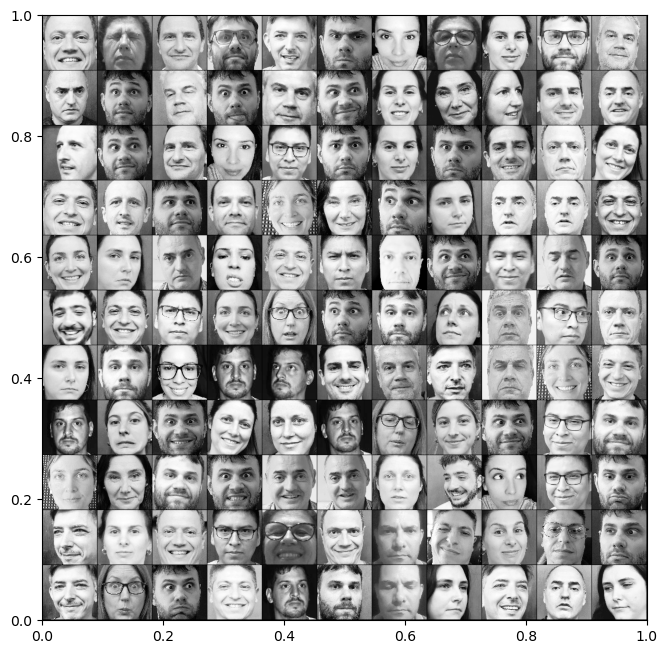

In [59]:
displayData(train[:201],100)

In [9]:
# funcion que devuelve el PCA de un dataset
## es decir, por cada foto (fila) va a devolver <n_componentes> cantidad de columnas.
# esto es lo que se usa de entrada
def pca_faces(n_componentes, dataset):
    pca = PCA(n_components= n_componentes)
    pca.fit(dataset)
    U = pca.components_
    Z = pca.transform(dataset)
    
    return Z

In [10]:
# hago el pca para las fotos de train
pca_train = pca_faces(30, train)

In [70]:
pca_train.shape

(121, 30)

# Backpropagation

In [11]:
# y_train_ contiene los nombres de la persona de cada foto EN ORDEN como aparecen en el dataset
# (ver mas arriba donde estan mostradas las fotos)

X_train = pca_train
y_train_ = ['nestor', 'claudia', 'oscar', 'eduardo', 'andres', 'eduardo', 'lujan', 'claudia', 'maira', 'eduardo', 'eduardo',
           'marcelo t.','eduardo', 'marcelo', 'eduardo', 'marcelo', 'eduardo', 'maira', 'silvia', 'marisa', 'sebastian', 'marcelo t.',
           'geronimo', 'eduardo', 'oscar', 'lujan', 'jiang', 'eduardo', 'maira', 'eduardo', 'sebastian', 'nestor', 'fernanda',
           'hernan', 'geronimo', 'eduardo', 'elemir', 'julieta', 'silvia', 'eduardo', 'josefina', 'marcelo t.', 'marcelo t.', 'hernan',
           'julieta', 'josefina', 'marcelo t.', 'lujan', 'hernan', 'jiang', 'nestor', 'eduardo', 'jiang', 'marcelo t.', 'eduardo',
           'joaquin', 'hernan', 'jiang', 'julieta', 'marisa', 'eduardo', 'eduardo', 'fernanda', 'marcelo', 'jiang', 'nestor',
           'josefina', 'eduardo', 'lujan', 'rodrigo', 'rodrigo', 'sebastian', 'marcelo', 'andres', 'marcelo', 'julieta', 'hernan',
           'rodrigo', 'maribel', 'eduardo', 'fernanda', 'fernanda', 'rodrigo', 'marisa', 'maribel', 'eduardo', 'jiang', 'eduardo',
           'julieta', 'silvia', 'eduardo', 'eduardo', 'marcelo t.', 'marcelo t.', 'fernanda', 'joaquin', 'lujan', 'jiang', 'eduardo',
           'andres', 'maira', 'nestor', 'jiang', 'claudia', 'nestor', 'elemir', 'hernan', 'maira', 'hernan', 'eduardo', 
           'andres', 'marisa', 'eduardo', 'hernan', 'rodrigo', 'eduardo', 'elemir', 'josefina', 'andres', 'marcelo t.', 'josefina']

# para poder usar esta lista de nombres, debo meterlas como un array de 0s y 1s.
# en la celda de abajo se ve mas claro pero aca esta la transformacion hecha
y_train = LabelBinarizer().fit_transform(y_train_)



In [12]:
# imprimo cada elemento del vector de nombres con su correspondiente array de 0 y 1.
# por ejemplo el array que tenga un 1 en la posicion 2 significa "claudia"
for i in range(10):
    print(f"{y_train_[i]}:{y_train[i]}")

nestor:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
claudia:[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
oscar:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
eduardo:[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
andres:[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
eduardo:[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
lujan:[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
claudia:[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
maira:[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
eduardo:[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [13]:
import pandas as pd
pd.Series(y_train_).value_counts()
## esto es para ver cuantas fotos hay de cada persona. Si hay menos fotos va a tener menos chance de reconocer
# a cada persona.
# Recuerden que a nuestro dataset le faltan fotos, por eso hay menos fotos por persona.
# tambien falta gente
# lo ideal seria conseguir un dataset bueno o volver a procesarlo pero creo que ya no hay tiempo jajs

eduardo       26
marcelo t.     9
hernan         8
jiang          8
nestor         6
rodrigo        5
andres         5
lujan          5
maira          5
marcelo        5
josefina       5
julieta        5
fernanda       5
marisa         4
elemir         3
sebastian      3
claudia        3
silvia         3
geronimo       2
joaquin        2
oscar          2
maribel        2
Name: count, dtype: int64

In [14]:
## aca arranca todo el script, les marco con ####### las partes que modifique del original


def func_eval(fname, x):
    match fname:
        case "purelin":
            y = x
        case "logsig":
            y = 1.0 / ( 1.0 + np.exp(-x) )
        case "tansig":
            y = 2.0 / ( 1.0 + math.exp(-2.0*x) ) - 1.0
    return y

func_eval_vec = np.vectorize(func_eval)

def deriv_eval(fname, y):  
    match fname:
        case "purelin":
            d = 1.0
        case "logsig":
            d = y*(1.0-y)
        case "tansig":
            d = 1.0 - y*y
    return d

deriv_eval_vec = np.vectorize(deriv_eval)

# La entrada ahora va a ser X_train que es la matriz  
# con el PCA de las fotos de train
###############################################
entrada =  X_train 
###############################################


# La salida ahora es y_train, un array de 0s y 1s por cada foto, indicando a quien pertenece
# como vimos arriba.
###############################################
salida = y_train
###############################################


# Paso las listas a numpy
X = np.array(entrada)
Y = np.array(salida)

filas_qty = len(X)
###########################
# Cantidad de neuronas de entradas: 1 por Componente principal
input_size = X.shape[1]   # 1 por CP
###########################


hidden_size = 2  # neuronas capa oculta

# Cantidad de neuronas de salida: 1 por persona en train
###########################
output_size = Y.shape[1] 
###########################

# defino las funciones de activacion de cada capa
hidden_FUNC = 'logsig'  # uso la logistica

# Cambie la funcion a logsig como decia el enunciado
###############################################
output_FUNC = 'logsig'  # uso la logistica
###############################################


# incializo los graficos
#grafico = perceptron_plot(X, np.array(salida), 0.0)

# Incializo las matrices de pesos azarosamente
# W1 son los pesos que van del input a la capa oculta
# W2 son los pesos que van de la capa oculta a la capa de salida
np.random.seed(1021) #mi querida random seed para que las corridas sean reproducibles
W1 = np.random.uniform(-0.5, 0.5, [hidden_size, input_size])
X01 = np.random.uniform(-0.5, 0.5, [hidden_size, 1] )
W2 = np.random.uniform(-0.5, 0.5, [output_size, hidden_size])
X02 = np.random.uniform(-0.5, 0.5, [output_size, 1] )

# Avanzo la red, forward
# para TODOS los X al mismo tiempo ! 
#  @ hace el producto de una matrix por un vector_columna
hidden_estimulos = W1 @ X.T + X01
hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
output_estimulos = W2 @ hidden_salidas + X02
output_salidas = func_eval_vec(output_FUNC, output_estimulos)

# calculo el error promedi general de TODOS los X
Error = np.mean( (Y.T - output_salidas)**2 )
print(f"Error inicial {Error}")

# Inicializo
epoch_limit = 2000    # para terminar si no converge
Error_umbral = 1.0e-06
learning_rate = 0.2
Error_last = 10    # lo debo poner algo dist a 0 la primera vez
epoch = 0

while ( math.fabs(Error_last-Error)>Error_umbral and (epoch < epoch_limit)):
    epoch += 1
    Error_last = Error
    
    # recorro siempre TODA la entrada
    for fila in range(filas_qty): #para cada input x_sub_fila del vector X
        # propagar el x hacia adelante
        hidden_estimulos = W1 @ X[fila:fila+1, :].T + X01
        hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
        output_estimulos = W2 @ hidden_salidas + X02
        output_salidas = func_eval_vec(output_FUNC, output_estimulos)
        
        # calculo los errores en la capa hidden y la capa output
        ErrorSalida = Y[fila:fila+1,:].T - output_salidas
        # output_delta es un solo numero
        output_delta = ErrorSalida * deriv_eval_vec(output_FUNC, output_salidas)
        # hidden_delta es un vector columna
        hidden_delta = deriv_eval_vec(hidden_FUNC, hidden_salidas)*(W2.T @ output_delta)

        # ya tengo los errores que comete cada capa
        # corregir matrices de pesos, voy hacia atras
        # backpropagation
        W1 = W1 + learning_rate * (hidden_delta @ X[fila:fila+1, :] )
        X01 = X01 + learning_rate * hidden_delta
        W2 = W2 + learning_rate * (output_delta @ hidden_salidas.T)
        X02 = X02 + learning_rate * output_delta

    # ya recalcule las matrices de pesos
    # ahora avanzo la red, feed-forward
    hidden_estimulos = W1 @ X.T + X01
    hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
    output_estimulos = W2 @ hidden_salidas + X02
    output_salidas = func_eval_vec(output_FUNC, output_estimulos)
    print(hidden_estimulos.shape)
    # calculo el error promedio general de TODOS los X
    Error= np.mean( (Y.T - output_salidas)**2 )
    
    # Imprimo el error en cada epoch
    ###############################################
    print(f"epoch: {epoch} - error: {Error}")
    ###############################################

/var/folders/y4/vf4m1vd95l97ysrydp39y6vw0000gn/T/ipykernel_10929/825237367.py:9: RuntimeWarning: overflow encountered in exp
  y = 1.0 / ( 1.0 + np.exp(-x) )


Error inicial 0.25245405950992145
(2, 121)
epoch: 1 - error: 0.05959677482683672
(2, 121)
epoch: 2 - error: 0.04816777604976944
(2, 121)
epoch: 3 - error: 0.04493127695684459
(2, 121)
epoch: 4 - error: 0.043454085116502714
(2, 121)
epoch: 5 - error: 0.042622952060025684
(2, 121)
epoch: 6 - error: 0.04209570666225317
(2, 121)
epoch: 7 - error: 0.041733755077000965
(2, 121)
epoch: 8 - error: 0.041470839506862985
(2, 121)
epoch: 9 - error: 0.041271546242579574
(2, 121)
epoch: 10 - error: 0.041115351168660434
(2, 121)
epoch: 11 - error: 0.04098960065718198
(2, 121)
epoch: 12 - error: 0.040886101627597836
(2, 121)
epoch: 13 - error: 0.0407993329643534
(2, 121)
epoch: 14 - error: 0.04072544806733942
(2, 121)
epoch: 15 - error: 0.04066168998781335
(2, 121)
epoch: 16 - error: 0.040606033864131204
(2, 121)
epoch: 17 - error: 0.0405569604681783
(2, 121)
epoch: 18 - error: 0.04051330837846579
(2, 121)
epoch: 19 - error: 0.04047417489724324
(2, 121)
epoch: 20 - error: 0.04043884806302145
(2, 121)


In [19]:
# Esto es para agarrar una foto (el nro de fila indica que foto queremos, la foto en esa posicion del dataset)
# y hacer una prediccion

# Todos los pesos  (W1, W2) ya estan calculados, es lo que termina calculando la red cuando
# se corre lo de arriba. Esto simplemente toma todos esos pesos y una foto y hace 
# las predicciones.

# En el enunciado lo explicaba pero vamos a tener una neurona de salida por cada persona (no por cada foto).

fila = 0 
hidden_estimulos_predict = W1 @ X[fila:fila+1, :].T + X01
hidden_salidas_predict = func_eval_vec(hidden_FUNC, hidden_estimulos_predict)
output_estimulos_predict = W2 @ hidden_salidas_predict + X02
output_salidas_predict = func_eval_vec(output_FUNC, output_estimulos_predict)
output_salidas_predict

/var/folders/y4/vf4m1vd95l97ysrydp39y6vw0000gn/T/ipykernel_10517/3262515648.py:9: RuntimeWarning: overflow encountered in exp
  y = 1.0 / ( 1.0 + np.exp(-x) )


array([[0.05375805],
       [0.00836911],
       [0.03277859],
       [0.04081642],
       [0.0506385 ],
       [0.01365653],
       [0.0523828 ],
       [0.08040962],
       [0.01479726],
       [0.0293036 ],
       [0.07710785],
       [0.03657548],
       [0.06298341],
       [0.05768009],
       [0.10799194],
       [0.02228998],
       [0.01049317],
       [0.09392047],
       [0.0151055 ],
       [0.00650372],
       [0.04319404],
       [0.02271603]])

In [18]:
## viendo arriba output_salidas_predict, vemos la salida de cada neurona.
## mas cercano a 0, te dice que la foto se parece menos y mas cercano a 1 que se parece mas
## Entonces el resultado final seria TOMAR EL VALOR MAXIMO Y VER A QUE NEURONA PERTENECE. LA PERSONA QUE ESTE
## REPRESENTADA POR ESA NEURONA VA A SER LA PREDICCION.

# Falta esa parte. En este caso con la foto 0 el valor mas alto es 0.10799194 (que es bastante chico porque seguro
# es una porqueria la red jskdjs son muy pocas fotos). Pero COMO SE A QUE PERSONA CORRESPONDE LA NEURONA QUE TIRO ESA PREDICCION?
# CREO que seria por el orden de:

y_train_

# LabelBinarizer que es lo que arma los arrays supongo que va creando los arrays en orden. Pero no se bien, 
# le pueden preguntar en zulip sino.


## Despues si podemos obtener una prediccion con eso, lo que faltaria seria ir haciendo lo que dice el enunciado,
# ir cambiando el numero de componentes con los que se hace PCA e ir viendo que pasa, ir documentando todo eso en la wiki
# no me acuerdo que mas pedia que vayamos cambiando en el enunciad.

# Y esto yo lo deje aca en esta notebook, pero habria que pasarlo a un script, es decir, a un archivo .py y los datasets tambien
# Se puede subir aca a este rpositorio github (los datasets ya estan subidos) y despues le pasamos el link al profe,
# creo que habia pedido que hagamos eso. Si lo pasan a un script vayan borrando los comentarios que puse o modificandolos
## los escribi para ustedes nomas  


['nestor',
 'claudia',
 'oscar',
 'eduardo',
 'andres',
 'eduardo',
 'lujan',
 'claudia',
 'maira',
 'eduardo',
 'eduardo',
 'marcelo t.',
 'eduardo',
 'marcelo',
 'eduardo',
 'marcelo',
 'eduardo',
 'maira',
 'silvia',
 'marisa',
 'sebastian',
 'marcelo t.',
 'geronimo',
 'eduardo',
 'oscar',
 'lujan',
 'jiang',
 'eduardo',
 'maira',
 'eduardo',
 'sebastian',
 'nestor',
 'fernanda',
 'hernan',
 'geronimo',
 'eduardo',
 'elemir',
 'julieta',
 'silvia',
 'eduardo',
 'josefina',
 'marcelo t.',
 'marcelo t.',
 'hernan',
 'julieta',
 'josefina',
 'marcelo t.',
 'lujan',
 'hernan',
 'jiang',
 'nestor',
 'eduardo',
 'jiang',
 'marcelo t.',
 'eduardo',
 'joaquin',
 'hernan',
 'jiang',
 'julieta',
 'marisa',
 'eduardo',
 'eduardo',
 'fernanda',
 'marcelo',
 'jiang',
 'nestor',
 'josefina',
 'eduardo',
 'lujan',
 'rodrigo',
 'rodrigo',
 'sebastian',
 'marcelo',
 'andres',
 'marcelo',
 'julieta',
 'hernan',
 'rodrigo',
 'maribel',
 'eduardo',
 'fernanda',
 'fernanda',
 'rodrigo',
 'marisa',
 'ma